# Step 5: Coding Neural Network Activation Functions from Scratch

In [1]:
# grabbing our dense layer class from the previous lecture
from nnfs.datasets import spiral_data
import nnfs
import numpy as np
import matplotlib.pyplot as plt
nnfs.init()

class DenseLayer:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

Activation layers allow us to implement non-linearities. The output of a layer with an activation function is $f(X*W + B)$.

Without the addition of activation functions, the neural network sometimes struggles to grasp non-linear data. However, when these activation functions are stacked, the non-linearities compound and we are able to grasp more and more complex functions. 

In [2]:
# implementing the relu activation function
inputs = np.array([0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100])
output = np.maximum(0, inputs)
output

array([0. , 2. , 0. , 3.3, 0. , 1.1, 2.2, 0. ])

In [3]:
# a class implementation of the relu function
class ActivationReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

For our classification task, we need an activation function that can better serve that purpose, rather than ReLU. (Note: ReLU is still okay for hidden layers, but for the final layer, we'll use the softmax function, which can turn the output into probabilities.)

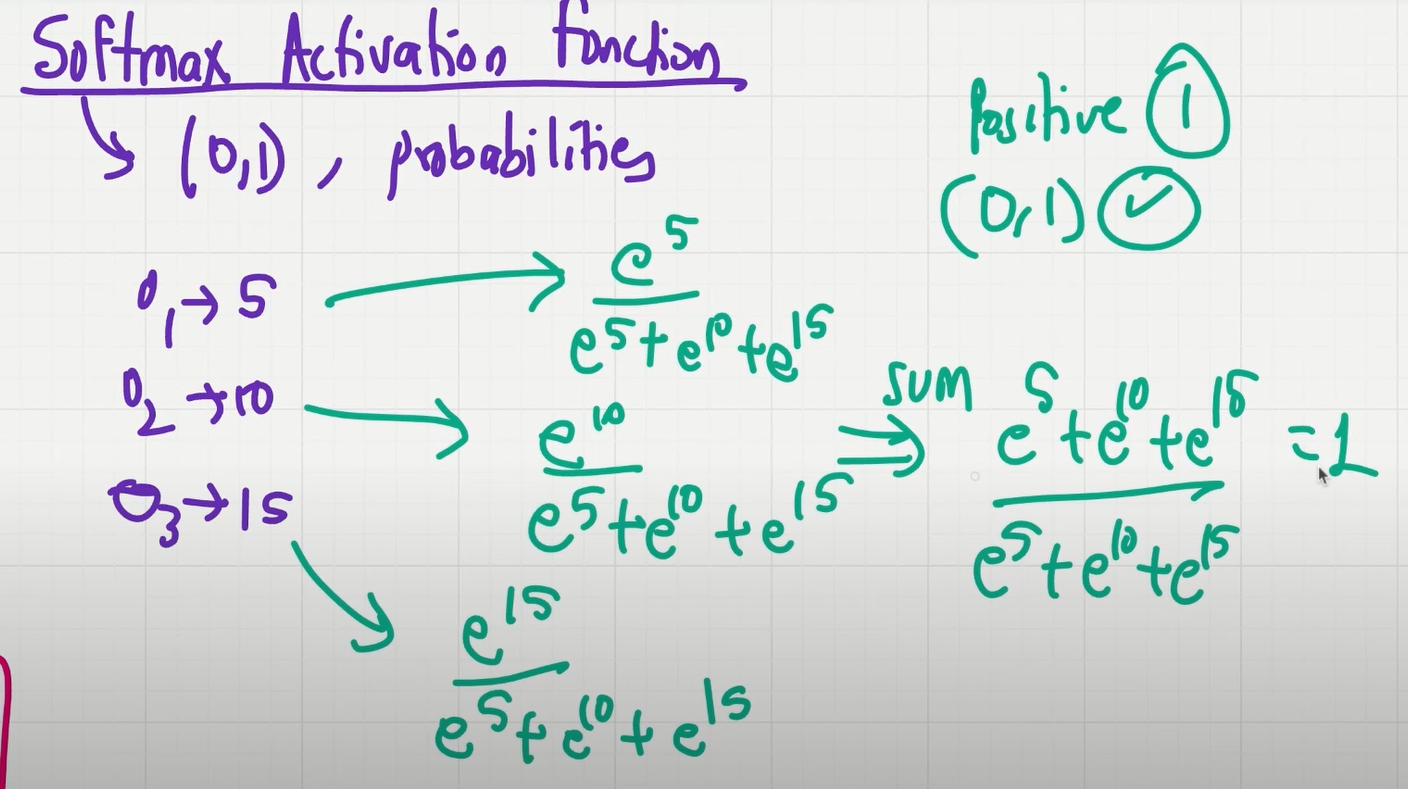

In [5]:
# softmax implementation
inputs = [
    [1, 2, 3, 2.5],
    [2, 5, -1, 2],
    [-1.5, 2.7, 3.3, -0.8]
]

exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
row_sums = np.sum(exp_values, axis=1, keepdims=True)
outputs = exp_values / row_sums
outputs


array([[0.06414769, 0.17437149, 0.47399085, 0.28748998],
       [0.04517666, 0.90739747, 0.00224921, 0.04517666],
       [0.00522984, 0.34875873, 0.63547983, 0.0105316 ]])

In [6]:
class ActivationSoftmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        row_sums = np.sum(exp_values, axis=1, keepdims=True)
        self.output = exp_values / row_sums

In [10]:
# initialize the data
X, y = spiral_data(samples=100, classes=3)

# initializing the layers
dense1 = DenseLayer(2, 3)
activation1 = ActivationReLU()
dense2 = DenseLayer(3, 3)
activation2 = ActivationSoftmax()

# forward pass
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

activation2.output[:5]

array([[0.33333334, 0.33333334, 0.33333334],
       [0.33333334, 0.33333334, 0.33333334],
       [0.33333328, 0.3333334 , 0.3333333 ],
       [0.3333333 , 0.33333334, 0.3333333 ],
       [0.33333334, 0.33333334, 0.33333334]], dtype=float32)